<a href="https://colab.research.google.com/github/10sneha/LoanPrediction/blob/main/LOAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

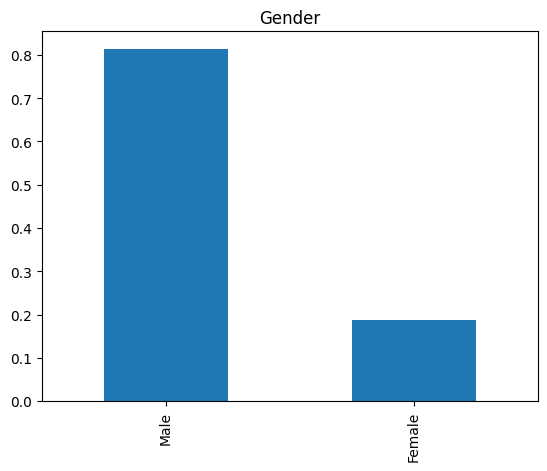

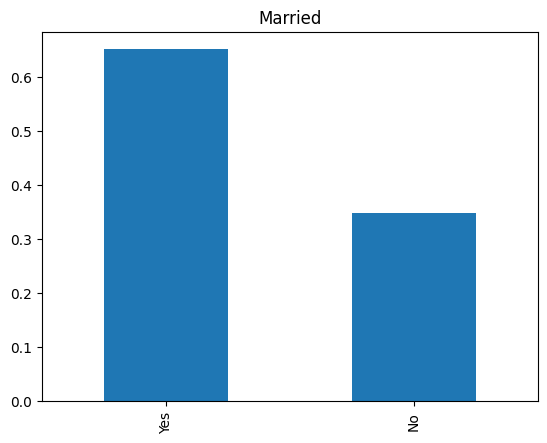

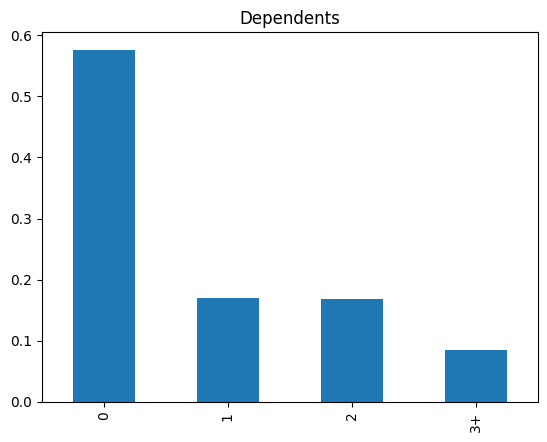

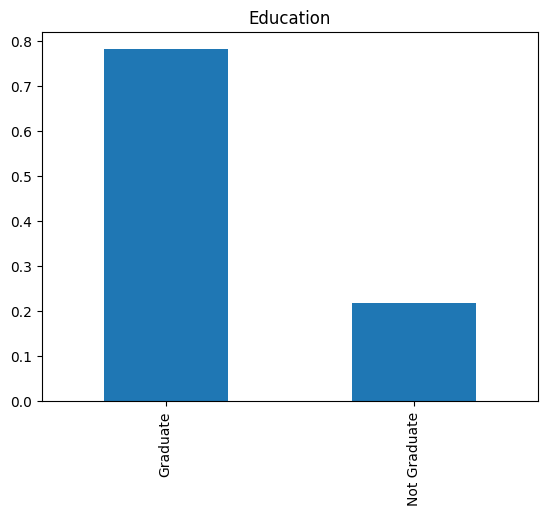

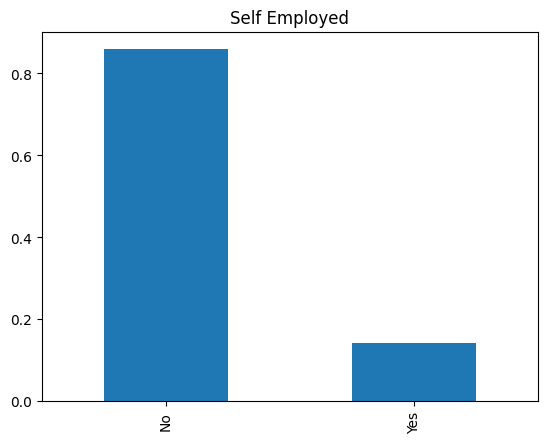

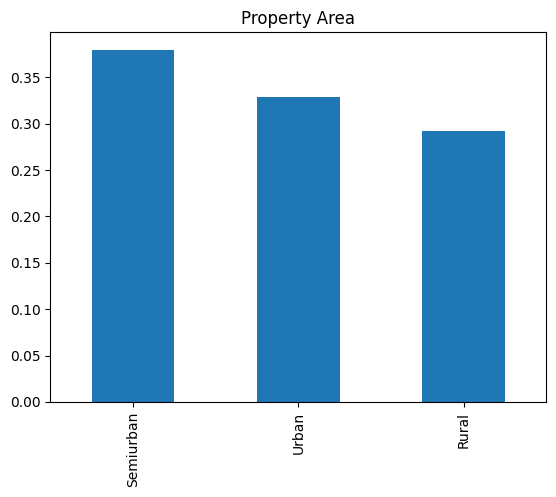

In [ ]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.show()

<ipython-input-43-f8ebec3382d5>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train.skew(), color="blue", axlabel= "Skewness")
<ipython-input-43-f8ebec3382d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.skew(), color="blue", axlabel= "Skewness")


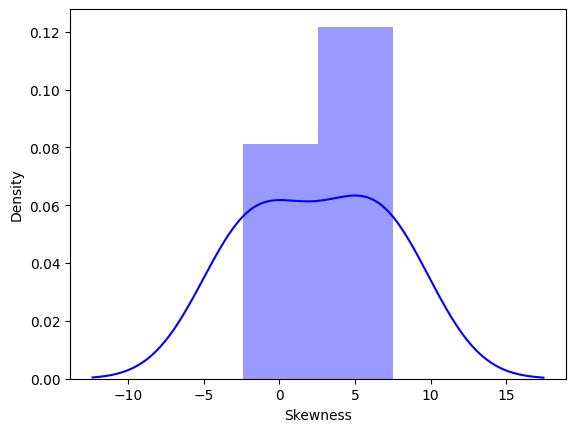

<ipython-input-43-f8ebec3382d5>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",norm_hist= False, kde=True, rug= False)
<ipython-input-43-f8ebec3382d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",norm_hist= False, kde=True, rug= False)


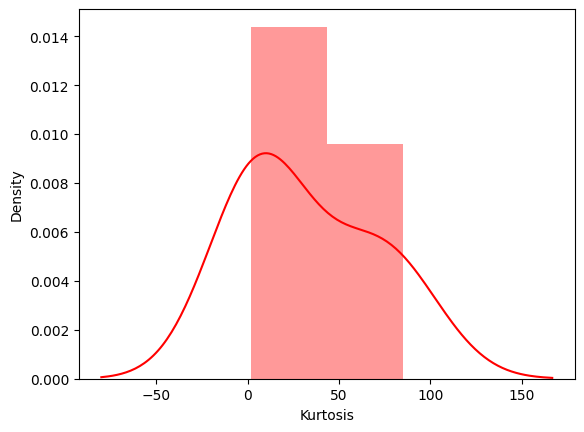

In [ ]:
sns.distplot(train.skew(), color="blue", axlabel= "Skewness")
plt.show()
sns.distplot(train.kurt(), color= "r", axlabel="Kurtosis",norm_hist= False, kde=True, rug= False)
plt.show()

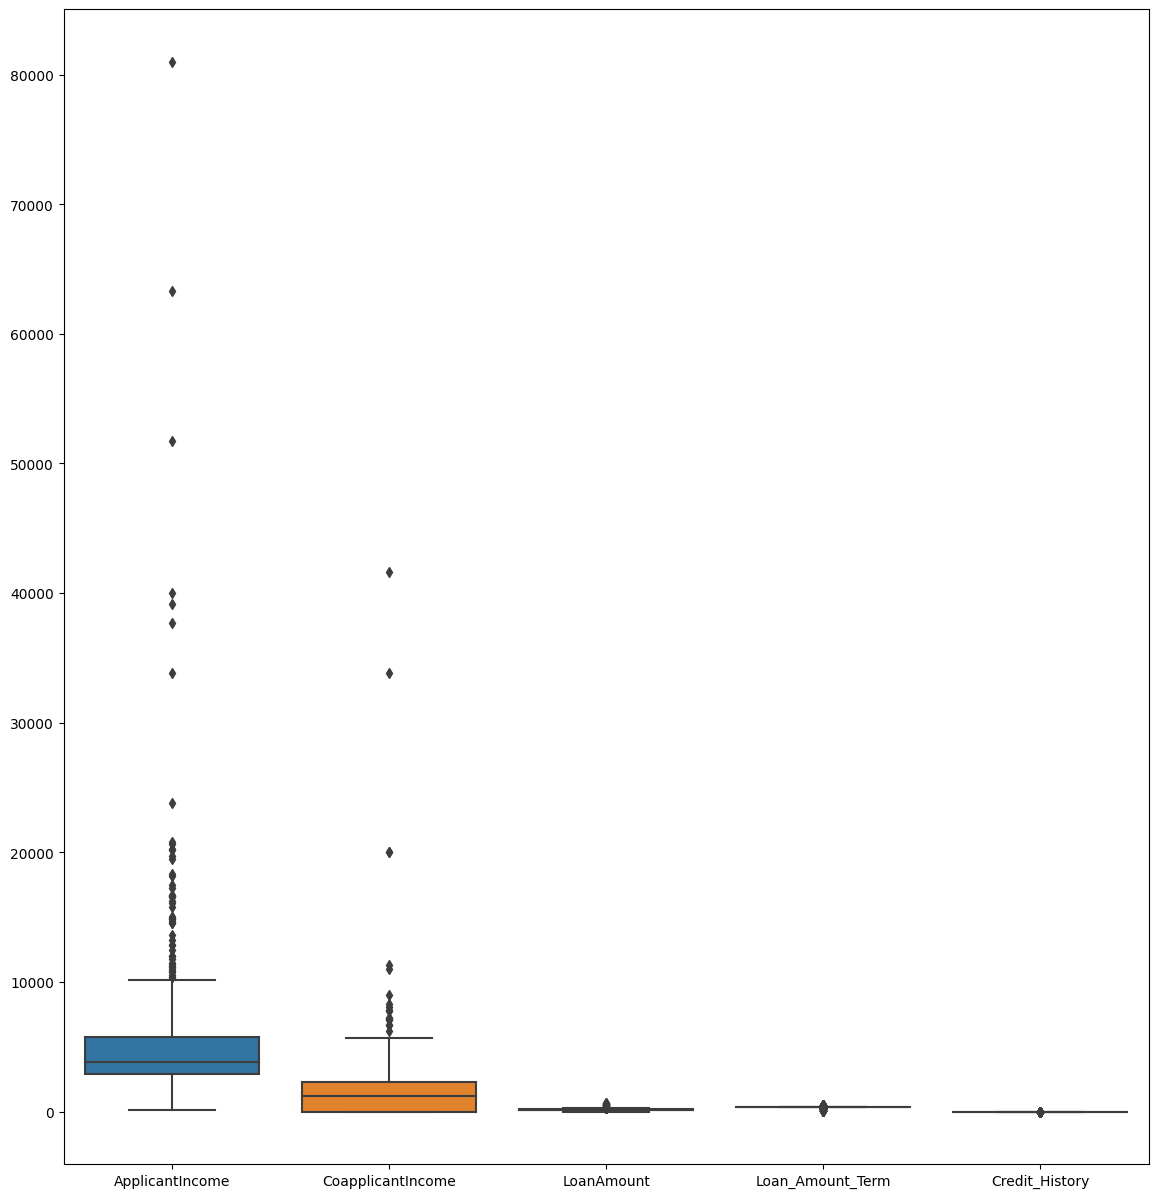

In [ ]:
plt.figure(figsize=(14,15))
sns.boxplot(data=train)
plt.show()

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

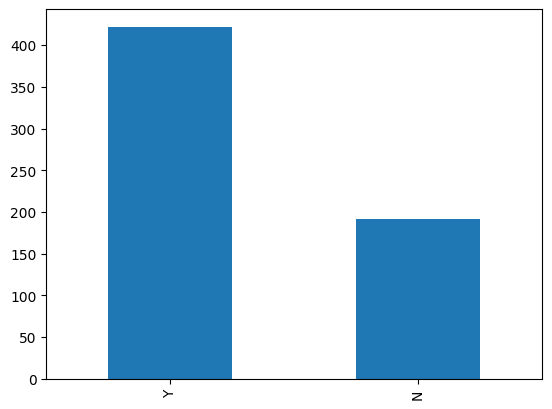

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

In [ ]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<ipython-input-48-5bb65a323532>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='viridis',linewidths=2,annot=True)


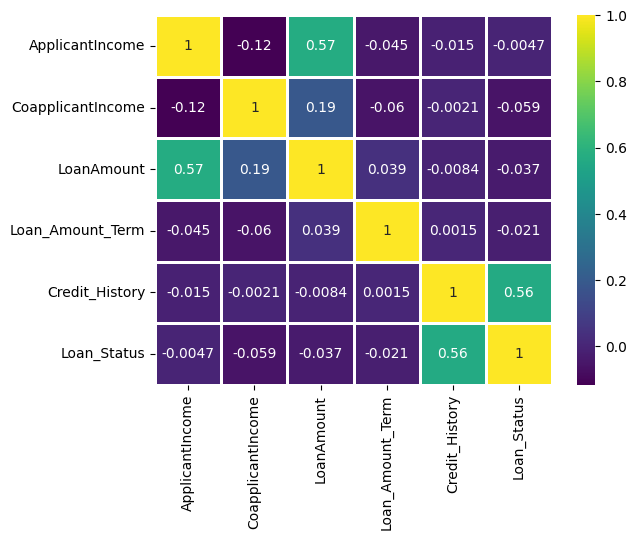

In [ ]:
sns.heatmap(train.corr(),cmap='viridis',linewidths=2,annot=True)
plt.show()

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
obj = (train.dtypes == 'object')
for col in list(obj[obj].index):
  train[col] = class_label_encoder.fit_transform(train[col])
obj = (test.dtypes == 'object')
for col in list(obj[obj].index):
  test[col] = class_label_encoder.fit_transform(test[col])

In [ ]:
for col in train.columns:
  train[col] = train[col].fillna(train[col].mean())
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
for col in test.columns:
  test[col] = test[col].fillna(test[col].mean())
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status
print(X.shape)
print(y.shape)

(614, 12)
(614,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7967479674796748

In [ ]:
pred_final_test = model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
test_original=pd.read_csv("test.csv")
submission['Loan_Status']=pred_final_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')
df=pd.read_csv('logistic.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.set_index('Loan_ID',inplace=True)
df.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,N
LP001031,N
LP001035,N
LP001051,Y


In [ ]:
df.to_csv('output.csv')
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>